### PROJET: EFFECTUER UNE REGRESSION LINEAIRE EN UTILISANT SKLEARN.

Dans ce projet, on utilisera les données d'une entreprise de vente de maillot de bain. 

In [1]:
# on importe les packages 

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [3]:
# on importe notre CSV 

data = pd.read_csv("./vente_maillots_de_bain.csv")

# on affiche les cinq premières lignes 
data.head()

,Years,Sales
0,1/1/2001,139.7
1,2/1/2001,114.3
2,3/1/2001,101.6
3,4/1/2001,152.4
4,5/1/2001,215.9


In [20]:
# la taille 
data.shape

(108, 3)

In [4]:
# on verifie si on a bien les types de données qu'il faut

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Years   108 non-null    object 
 1   Sales   108 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.8+ KB


Petit problème: la variable `Years` est de type object or elle doit être de type date. 

In [5]:
# on utilise la fonction adéquate 
data['Years'] = pd.to_datetime(data['Years'])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Years   108 non-null    datetime64[ns]
 1   Sales   108 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.8 KB


#### statistiques descriptives 

In [6]:
data.describe()

,Years,Sales
count,108,108.000000
mean,2005-06-16 08:26:40,399.909259
min,2001-01-01 00:00:00,101.600000
25%,2003-03-24 06:00:00,228.600000
50%,2005-06-16 00:00:00,412.750000
75%,2007-09-08 12:00:00,520.700000
max,2009-12-01 00:00:00,812.800000
std,NaN,174.541887


Important pour avoir quelques idées sur la tendance statistique du jeu de donnée. Dans le cas précis, la variable `Sales` est celle qu'on regardera. 
on a donc en moyenne à peu près 400 ventes de maillots et au maximum 812 de 2001 à 2009 par exemple 

##### Un petit graphique 
Cela nous permet de voir la tendance des ventes 

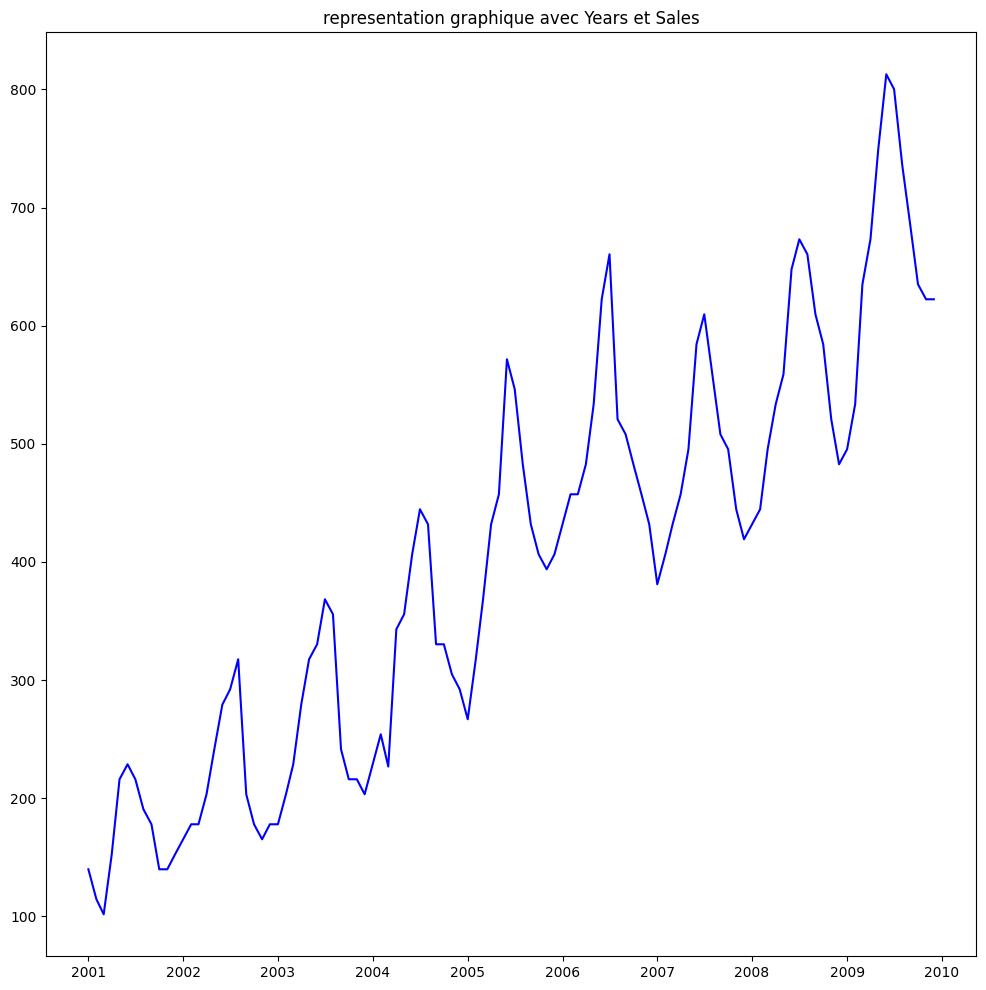

In [9]:
# on peut faire une representation graphique :

def data_show(df, x_column, y_column):
    plt.figure(figsize=(12,12))
    plt.plot(data[x_column], data[y_column], "b-")
    plt.title(f"representation graphique avec {x_column} et {y_column}")
    plt.show()

data_show(df= data, x_column="Years", y_column="Sales")

#### Modélisation

Je dois diviser mon jeu de donnée en deux: Une partie d'entrainement et une autre partie test. 

In [10]:
def data_preparation(df, y_column):
    df["time_index"] =  np.arange(0, len(df), 1)
    split_index = int(len(df)*0.8)
    train_df = df.iloc[split_index: ]
    test_df = df.iloc[: split_index]

    x_train = train_df[["time_index"]]
    y_train = train_df[[y_column]]

    x_test = test_df[['time_index']]
    y_test = test_df[[y_column]]

    return x_train, y_train, x_test, y_test


In [15]:
# je génère le model prédit 

def generate_fitted_model(x_train, y_train):
    model = LinearRegression()
    model.fit(x_train, y_train)

    return model 



In [27]:
# je teste le model:

def test_model(model, x_test, y_test):
    y_test_predicted = model.predict(x_test)
    plt.figure(figsize=(12,12))
    plt.plot(x_test, y_test, "b-")
    plt.plot(x_test, y_test_predicted, "r-")
    plt.title("valeurs prédites")
    plt.show()
    

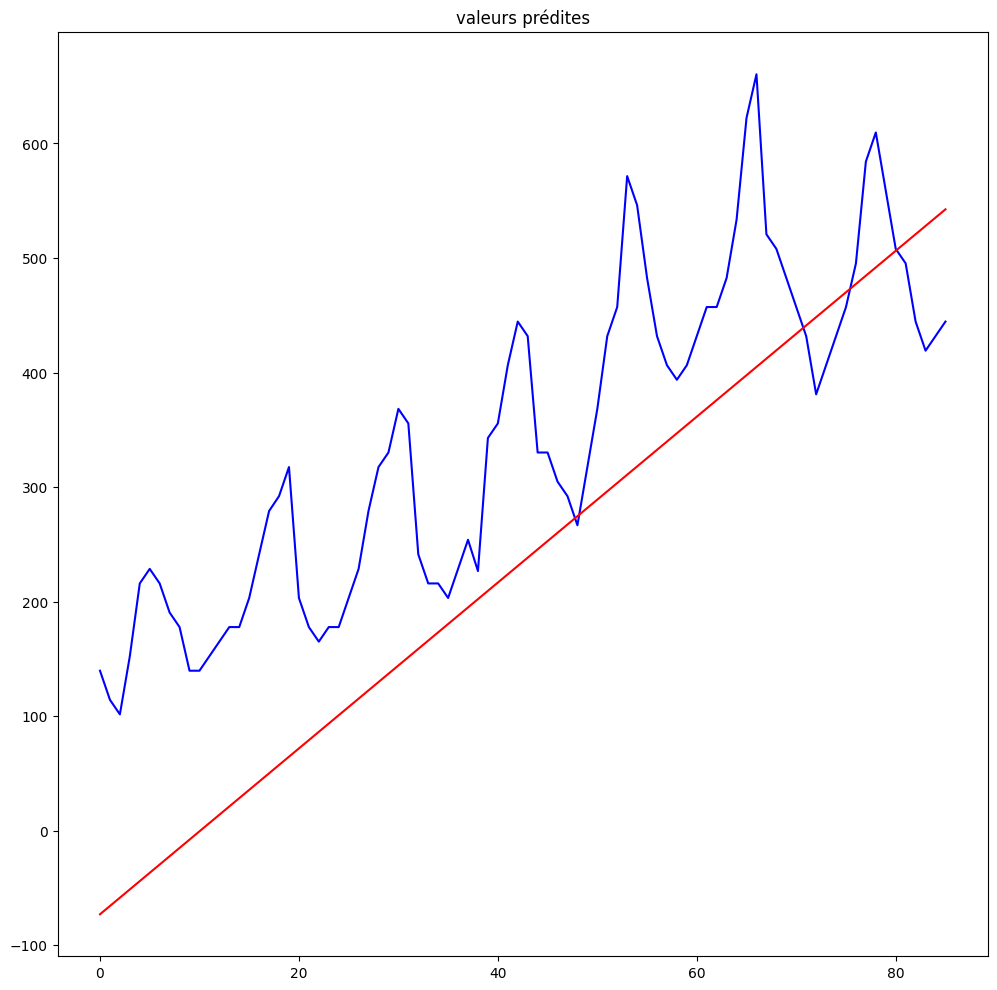

In [29]:
# On trace le graphique avec les valeurs prédites.


x_train, y_train, x_test, y_test = data_preparation(df=data, y_column="Sales")

generate_fitted_model(x_train, y_train)

model = generate_fitted_model(x_train, y_train)



test_model(model, x_test, y_test)

On peut dès lors remarquer que le modèle ne passe sur la majorité des points. 